In [1]:
import cv2
import pickle
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
img_height = 100
img_width = 100

In [3]:
legend = pd.read_csv("../data/yoga_poses.csv")
legend_dict = legend["Name"].to_dict()

In [4]:
def resize_without_squeezing(image, target_size):
    h, w = image.shape[:2]
    aspect_ratio = w / h

    # Calculate new size while preserving aspect ratio
    if aspect_ratio > 1:
        new_w = target_size
        new_h = int(target_size / aspect_ratio)
    else:
        new_h = target_size
        new_w = int(target_size * aspect_ratio)

    # Resize the image
    resized_img = cv2.resize(image, (new_w, new_h))

    # Create a canvas with the target size and fill with padding color
    canvas = np.full((target_size, target_size, 3), (255,255,255), dtype=np.uint8)

    # Calculate the position to paste the resized image in the center
    y_offset = (target_size - new_h) // 2
    x_offset = (target_size - new_w) // 2

    # Paste the resized image onto the canvas
    canvas[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized_img

    return canvas

In [5]:
# Open a video capture object
path = "../videos/pati.mov"
cap = cv2.VideoCapture(path)  # Use 0 for default camera or specify the video file path






1/1 [==============================] - 2s 2s/step
Position: urdhva mukha svanasana


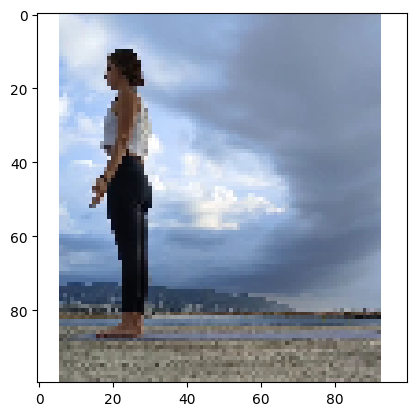

1/1 [==============================] - 0s 68ms/step
Position: natarajasana


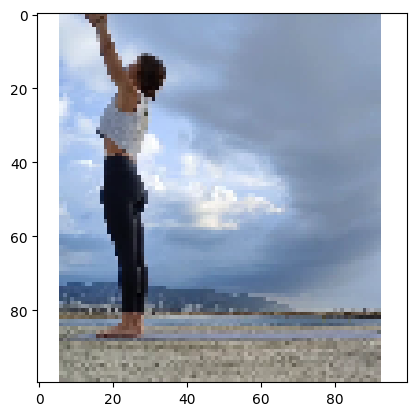

1/1 [==============================] - 0s 59ms/step
Position: parighasana


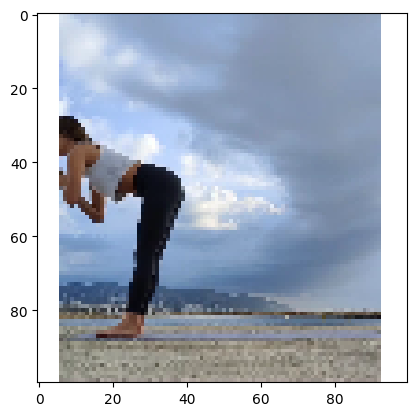

1/1 [==============================] - 0s 58ms/step
Position: parsvottanasana


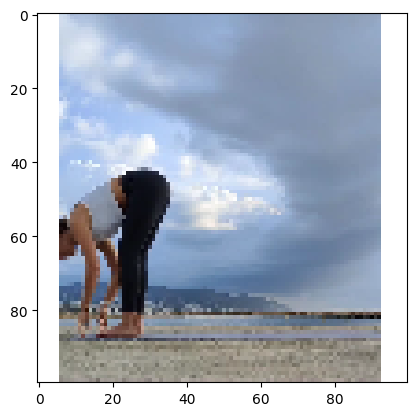

1/1 [==============================] - 0s 56ms/step
Position: natarajasana


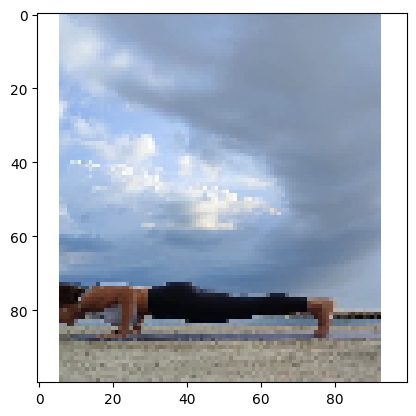

1/1 [==============================] - 0s 78ms/step
Position: urdhva mukha svanasana


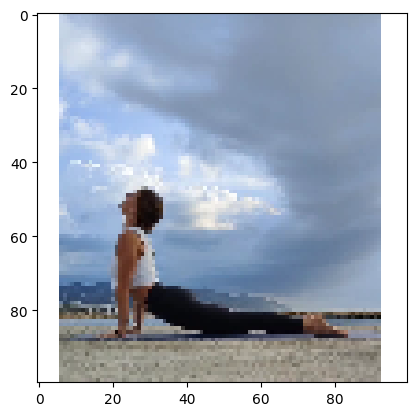

1/1 [==============================] - 0s 57ms/step
Position: adho mukha svanasana


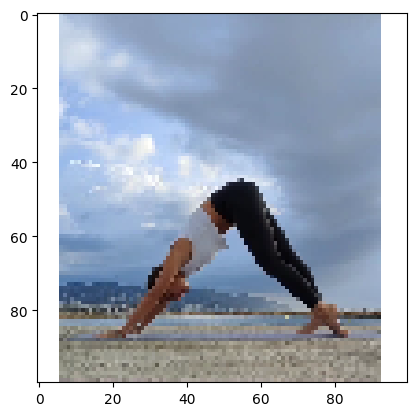

1/1 [==============================] - 0s 52ms/step
Position: parsvottanasana


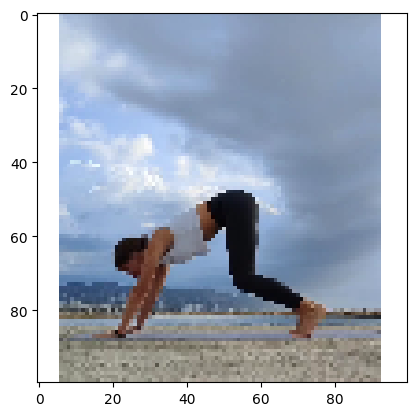

1/1 [==============================] - 0s 55ms/step
Position: virabhadrasana


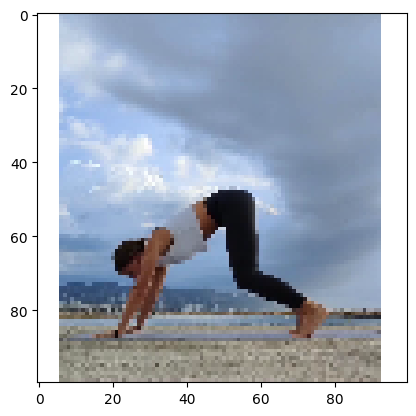

1/1 [==============================] - 0s 53ms/step
Position: parivrtta parsvakonasana


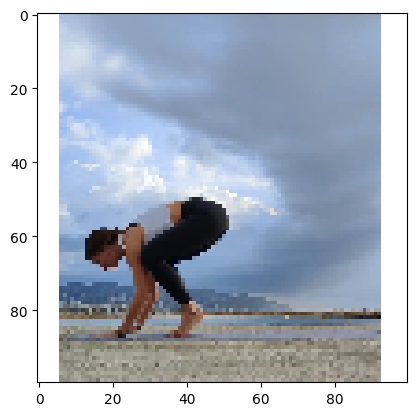

1/1 [==============================] - 0s 56ms/step
Position: bakasana


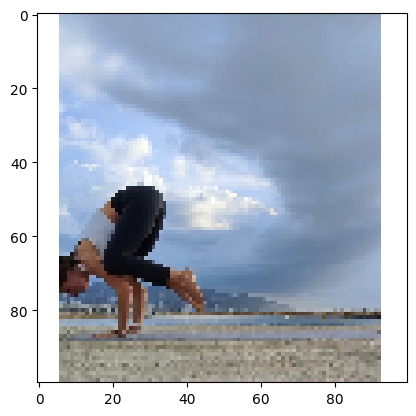

1/1 [==============================] - 0s 57ms/step
Position: parsva bakasana


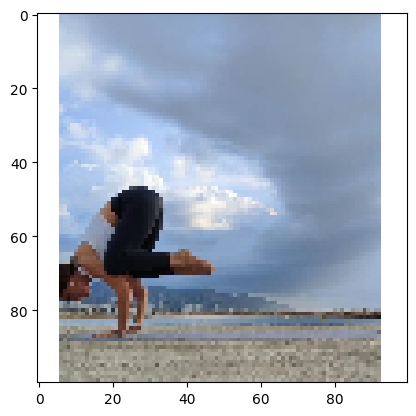

1/1 [==============================] - 0s 56ms/step
Position: bakasana


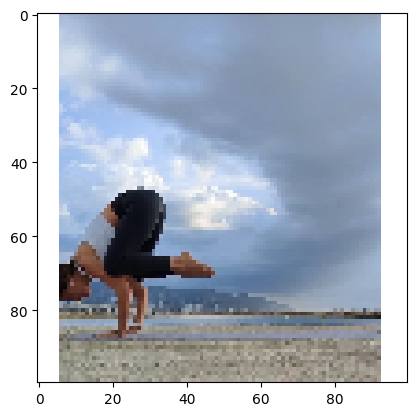

1/1 [==============================] - 0s 62ms/step
Position: sarvangasana


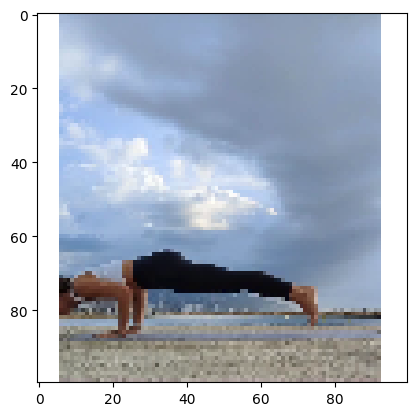

1/1 [==============================] - 0s 51ms/step
Position: urdhva mukha svanasana


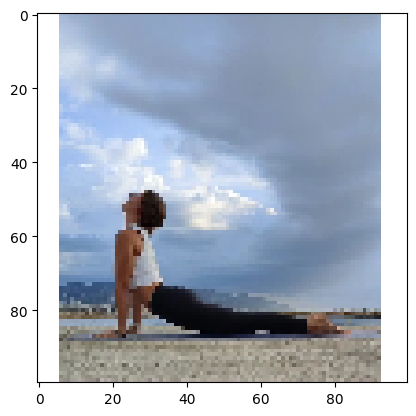

1/1 [==============================] - 0s 53ms/step
Position: adho mukha svanasana


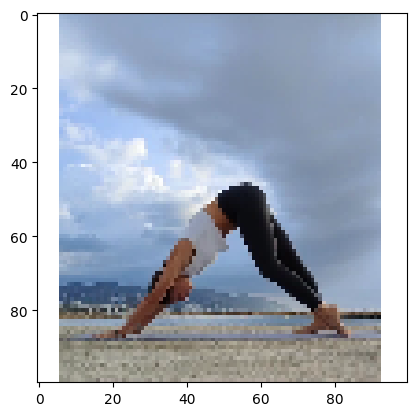

1/1 [==============================] - 0s 52ms/step
Position: chakrasana


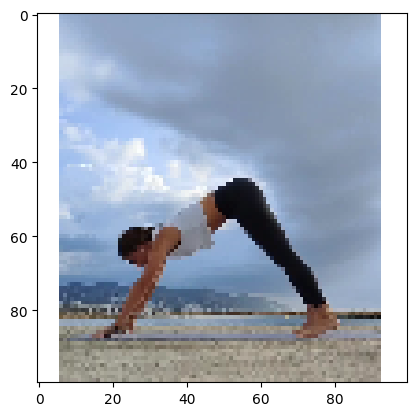

1/1 [==============================] - 0s 55ms/step
Position: marjaryasana


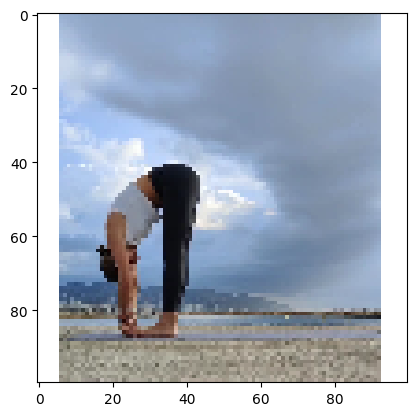

1/1 [==============================] - 0s 55ms/step
Position: dandasana


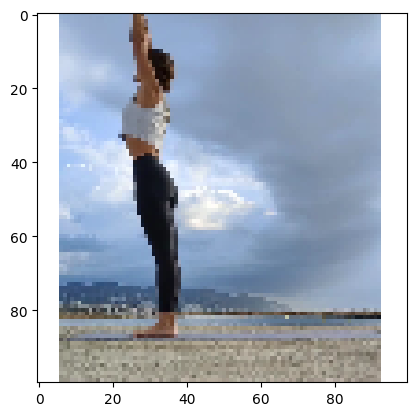

1/1 [==============================] - 0s 72ms/step
Position: utthita hasta padangusthasana


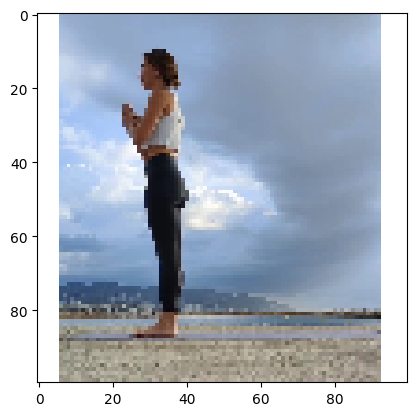

1/1 [==============================] - 0s 57ms/step
Position: vasishtasana


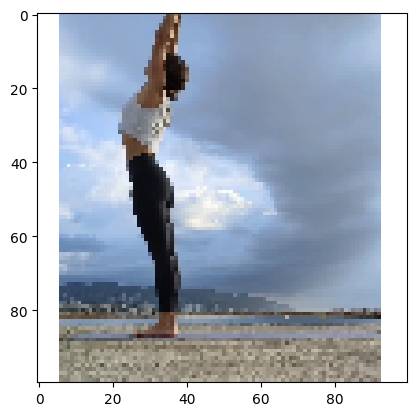

1/1 [==============================] - 0s 54ms/step
Position: marjaryasana


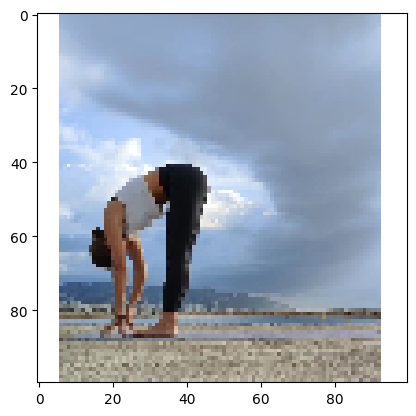

1/1 [==============================] - 0s 59ms/step
Position: bakasana


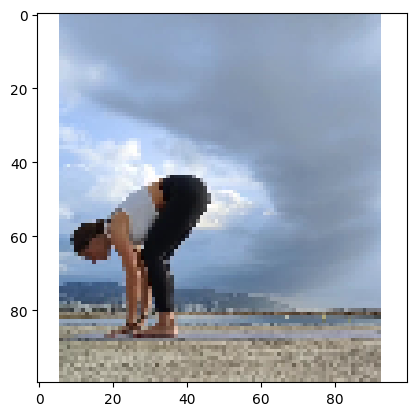

1/1 [==============================] - 0s 52ms/step
Position: vasishtasana


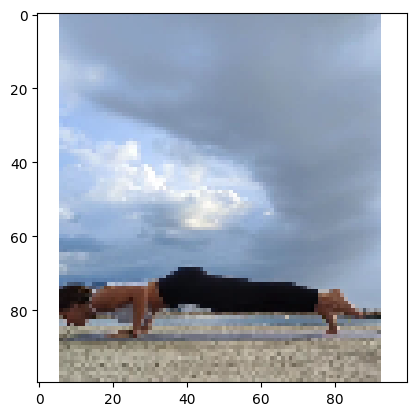

1/1 [==============================] - 0s 67ms/step
Position: urdhva mukha svanasana


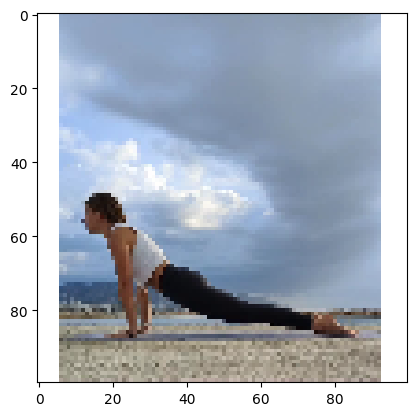

1/1 [==============================] - 0s 53ms/step
Position: adho mukha svanasana


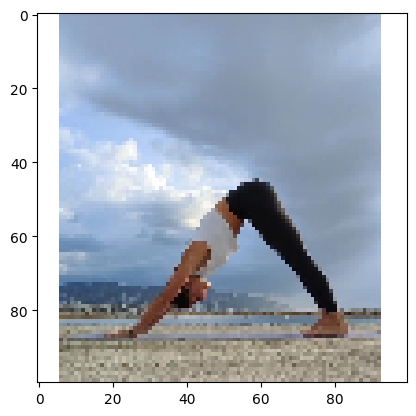

1/1 [==============================] - 0s 51ms/step
Position: purvottanasana


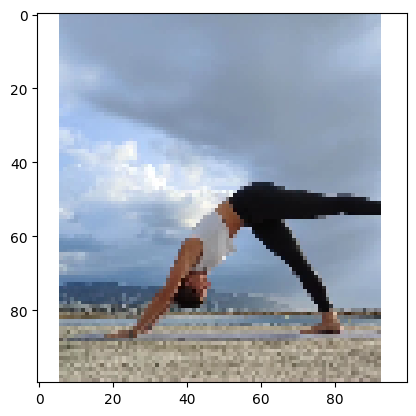

1/1 [==============================] - 0s 55ms/step
Position: parivrtta parsvakonasana


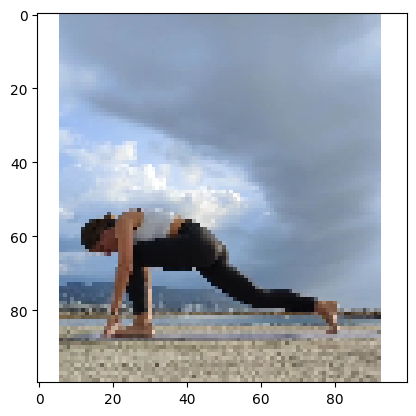

1/1 [==============================] - 0s 56ms/step
Position: virabhadrasana


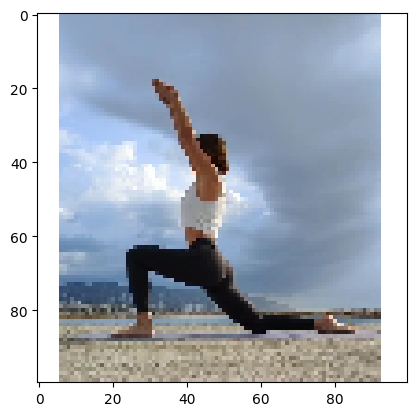

1/1 [==============================] - 0s 55ms/step
Position: parivrtta trikonasana


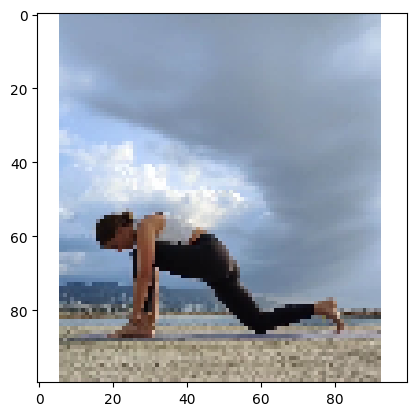

1/1 [==============================] - 0s 56ms/step
Position: adho mukha svanasana


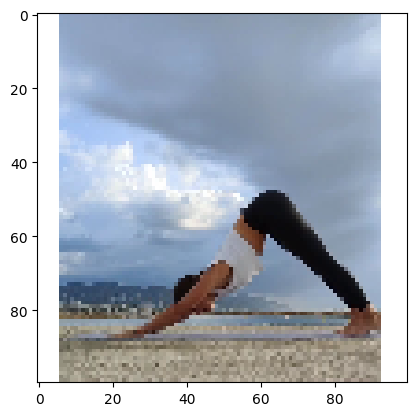

1/1 [==============================] - 0s 53ms/step
Position: parivrtta parsvakonasana


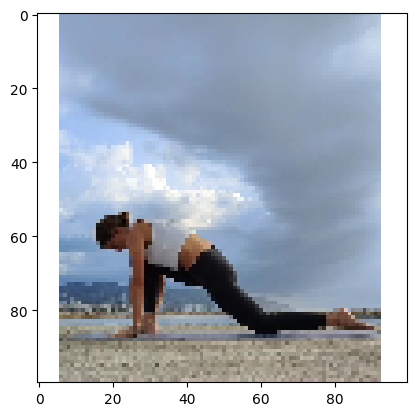

1/1 [==============================] - 0s 62ms/step
Position: utthita ashwa sanchalanasana


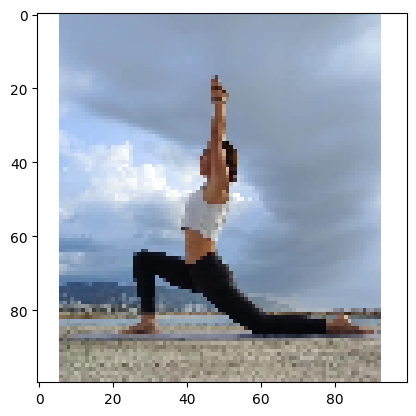

1/1 [==============================] - 0s 52ms/step
Position: bakasana


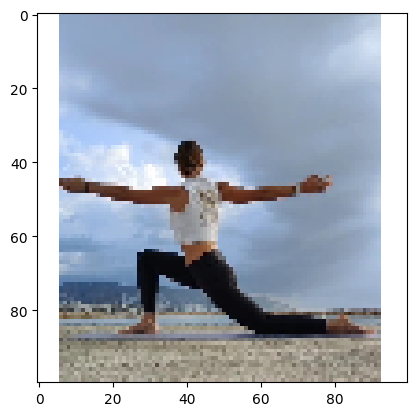

1/1 [==============================] - 0s 55ms/step
Position: virabhadrasana b


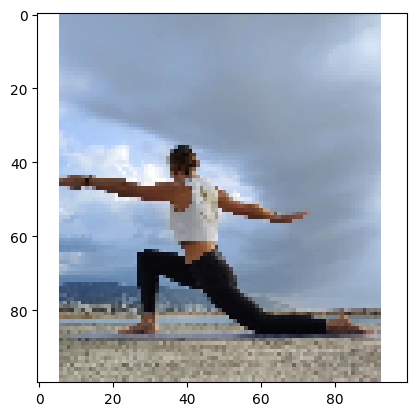

1/1 [==============================] - 0s 58ms/step
Position: utkatasana


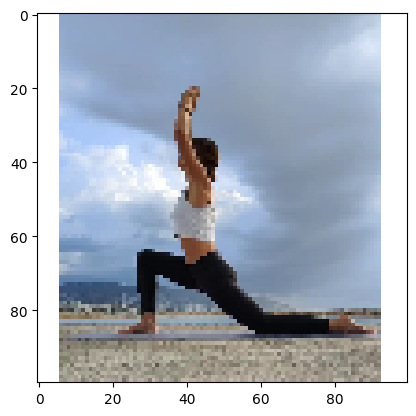

1/1 [==============================] - 0s 60ms/step
Position: camatkarasana


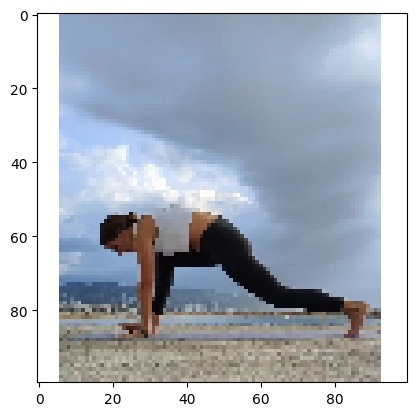

1/1 [==============================] - 0s 60ms/step
Position: adho mukha svanasana


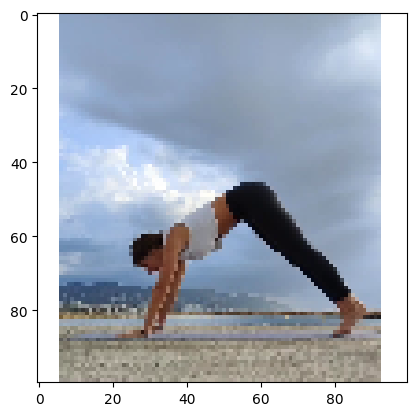

1/1 [==============================] - 0s 59ms/step
Position: bakasana


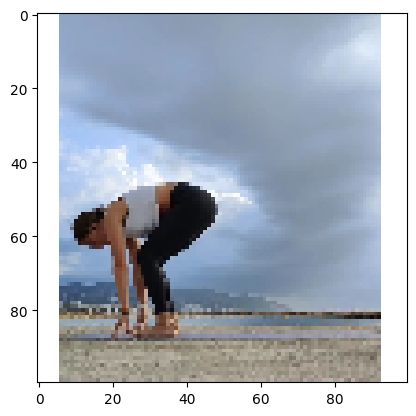

1/1 [==============================] - 0s 56ms/step
Position: ustrasana


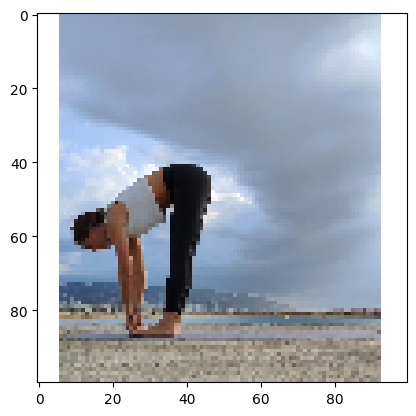

1/1 [==============================] - 0s 57ms/step
Position: virabhadrasana


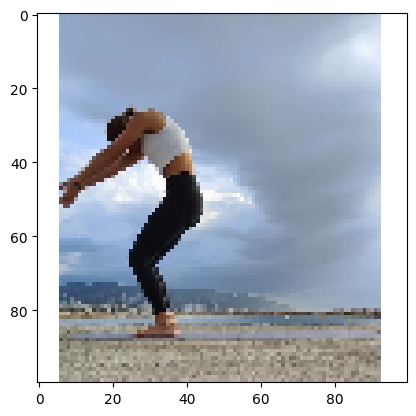

1/1 [==============================] - 0s 56ms/step
Position: utthita hasta padangusthasana


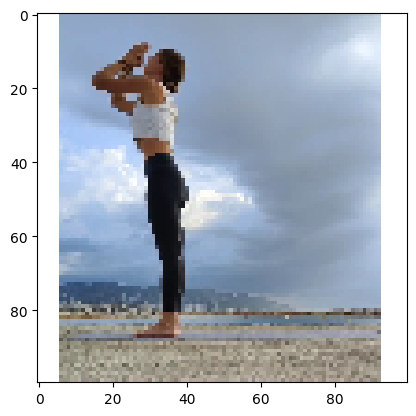

1/1 [==============================] - 0s 55ms/step
Position: parighasana


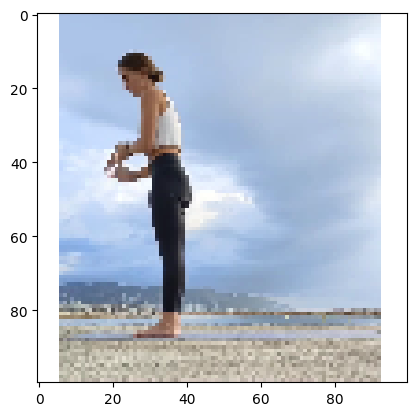

1/1 [==============================] - 0s 54ms/step
Position: sarvangasana


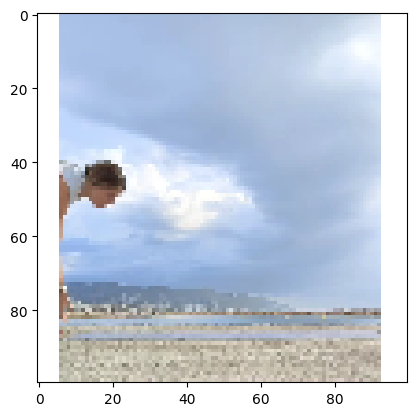

1/1 [==============================] - 0s 56ms/step
Position: dwi pada viparita dandasana


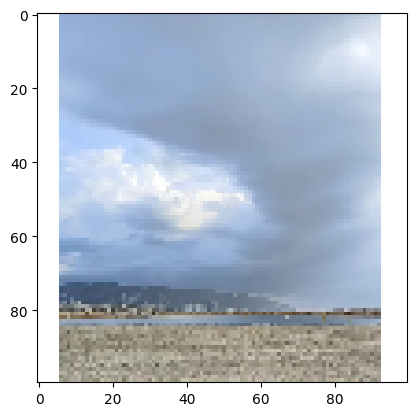

1/1 [==============================] - 0s 54ms/step
Position: tadasana


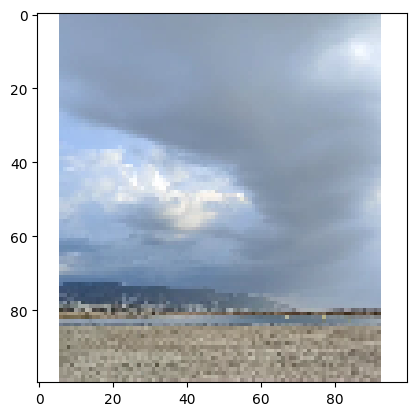

1/1 [==============================] - 0s 55ms/step
Position: navasana


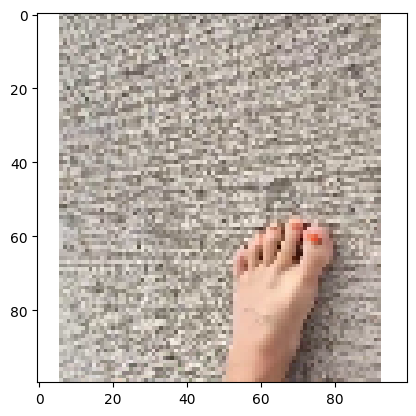

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [6]:
tmp = ''
model_file = '../models/dn2_1.pkl'
with open(model_file, 'rb') as f:
    model = pickle.load(f)

start_time = time.time()

while True: 
    # Read a frame from the video source
    ret, frame = cap.read()
    end_time = time.time()
    if end_time - start_time > 1:    
        #ret, frame = cap.read()
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = resize_without_squeezing(img,img_height)
        img_np = np.array([img])/255  
    
        # Your image processing and classification code goes here
        label = np.argmax(model.predict(img_np), axis=1)
        try:
            new_pose = legend_dict[label[0]]
            if new_pose!=tmp:
                tmp=new_pose
                print(f"Position: {new_pose}")  
                plt.imshow(img)
                plt.show()
        except KeyError:
            print(f"Key Error: {label[0]}")

        start_time = time.time()
    
    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
        
# Release the video capture object and close windows
cap.release()
cv2.destroyAllWindows()